Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly
#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

Importing the Dataset & Exploring it

In [ ]:
df =pd.read_csv('TSLA.csv') 

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-18,168.320007,172.000000,166.472000,171.679993,171.679993,81908500
1,2020-02-19,184.699997,188.955994,180.203995,183.483994,183.483994,127115000
2,2020-02-20,182.389999,182.399994,171.988007,179.882004,179.882004,88174500
3,2020-02-21,181.395996,182.612000,176.089996,180.199997,180.199997,71574000
4,2020-02-24,167.800003,172.699997,164.440002,166.757996,166.757996,75961000
...,...,...,...,...,...,...,...
498,2022-02-07,923.789978,947.770020,902.710022,907.340027,907.340027,20331500
499,2022-02-08,905.530029,926.289978,894.799988,922.000000,922.000000,16909700
500,2022-02-09,935.000000,946.270020,920.000000,932.000000,932.000000,17419800
501,2022-02-10,908.369995,943.809998,896.700012,904.549988,904.549988,22042300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,585.568692,598.840448,570.944362,585.536730,585.536730,4.620027e+07
std,294.331518,300.507300,287.264371,293.992766,293.992766,3.146898e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,9.800600e+06
25%,335.595001,363.868988,327.604004,330.175995,330.175995,2.338600e+07
50%,641.869995,654.320007,620.549988,643.380005,643.380005,3.385280e+07
75%,774.660004,783.724976,762.800018,775.349976,775.349976,6.266370e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,2.221262e+08


Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x= "Date", y="Close")

In [ ]:
px.line(df, x= "Date", y="Close")

In [ ]:
px.area(df, x= "Date", y="Volume")

In [ ]:
px.bar(df, y="Volume")

In [ ]:
px.box(df, y="Close")

Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-18,168.320007,172.000000,166.472000,171.679993,171.679993,81908500
1,2020-02-19,184.699997,188.955994,180.203995,183.483994,183.483994,127115000
2,2020-02-20,182.389999,182.399994,171.988007,179.882004,179.882004,88174500
3,2020-02-21,181.395996,182.612000,176.089996,180.199997,180.199997,71574000
4,2020-02-24,167.800003,172.699997,164.440002,166.757996,166.757996,75961000
...,...,...,...,...,...,...,...
498,2022-02-07,923.789978,947.770020,902.710022,907.340027,907.340027,20331500
499,2022-02-08,905.530029,926.289978,894.799988,922.000000,922.000000,16909700
500,2022-02-09,935.000000,946.270020,920.000000,932.000000,932.000000,17419800
501,2022-02-10,908.369995,943.809998,896.700012,904.549988,904.549988,22042300


In [ ]:
columns = ['Date', "Close"]
ndf = pd.DataFrame(df, columns=columns)

In [ ]:
prophet_df=ndf.rename(columns ={'Date':'ds','Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2020-02-18,171.679993
1,2020-02-19,183.483994
2,2020-02-20,179.882004
3,2020-02-21,180.199997
4,2020-02-24,166.757996
...,...,...
498,2022-02-07,907.340027
499,2022-02-08,922.000000
500,2022-02-09,932.000000
501,2022-02-10,904.549988


Creating Facebook Prophet Model

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting

In [ ]:
future = m.make_future_dataframe(periods=38)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-18,82.057784,-35.127772,172.654905,82.057784,82.057784,-16.057793,-16.057793,-16.057793,-16.057793,-16.057793,-16.057793,0.0,0.0,0.0,65.999991
1,2020-02-19,83.379420,-45.697697,171.834322,83.379420,83.379420,-15.456824,-15.456824,-15.456824,-15.456824,-15.456824,-15.456824,0.0,0.0,0.0,67.922596
2,2020-02-20,84.701056,-35.916812,166.763322,84.701056,84.701056,-20.423717,-20.423717,-20.423717,-20.423717,-20.423717,-20.423717,0.0,0.0,0.0,64.277339
3,2020-02-21,86.022692,-40.101514,167.195433,86.022692,86.022692,-21.778255,-21.778255,-21.778255,-21.778255,-21.778255,-21.778255,0.0,0.0,0.0,64.244437
4,2020-02-24,89.987599,-29.154977,182.363739,89.987599,89.987599,-15.672011,-15.672011,-15.672011,-15.672011,-15.672011,-15.672011,0.0,0.0,0.0,74.315589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,2022-03-17,1179.501452,1051.258750,1260.586752,1172.878559,1186.836125,-20.423717,-20.423717,-20.423717,-20.423717,-20.423717,-20.423717,0.0,0.0,0.0,1159.077735
537,2022-03-18,1181.453059,1059.879489,1268.454398,1174.289749,1189.149374,-21.778255,-21.778255,-21.778255,-21.778255,-21.778255,-21.778255,0.0,0.0,0.0,1159.674804
538,2022-03-19,1183.404666,1110.048364,1322.649704,1175.928320,1191.475098,44.694300,44.694300,44.694300,44.694300,44.694300,44.694300,0.0,0.0,0.0,1228.098966
539,2022-03-20,1185.356273,1126.443308,1334.366761,1177.339202,1193.774139,44.694300,44.694300,44.694300,44.694300,44.694300,44.694300,0.0,0.0,0.0,1230.050573


In [ ]:
px.line(forecast, x='ds', y='yhat')

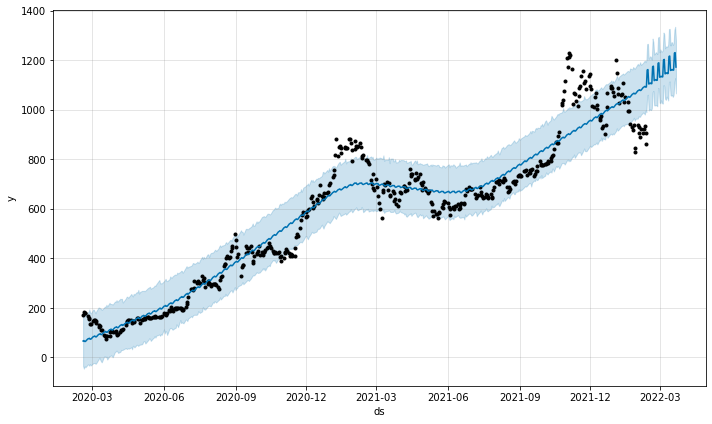

In [ ]:
figure=m.plot(forecast, xlabel='ds' , ylabel ="y")

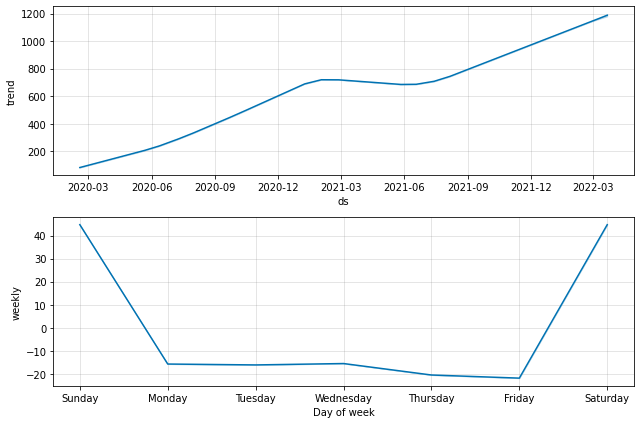

In [ ]:
figure2 =m.plot_components(forecast)

Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>